<a href="https://colab.research.google.com/github/amritanshu009/DSAexperiments/blob/main/SVR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Reddit_Data.csv to Reddit_Data.csv


In [ ]:
!ls

Reddit_Data.csv  sample_data


In [ ]:
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.svm import LinearSVC


In [ ]:
df = pd.read_csv(io.StringIO(uploaded['Reddit_Data.csv'].decode('utf-8')))

# Display available columns and a data sample.
print("Columns in the dataset:", df.columns.tolist())
print("Dataset sample:")
print(df.head())


Columns in the dataset: ['clean_comment', 'category']
Dataset sample:
                                       clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1


In [ ]:
df['clean_comment'] = df['clean_comment'].fillna('')
# Also drop rows with missing labels if any.
df = df.dropna(subset=['category'])

In [ ]:
X = df['clean_comment']
y = df['category']

In [ ]:
print("\nLabel distribution after cleaning:")
print(y.value_counts())


Label distribution after cleaning:
category
 1    15830
 0    13142
-1     8277
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), sublinear_tf=True, max_features=10000)),
    ('oversample', RandomOverSampler(random_state=42)),
    ('clf', LinearSVC(class_weight='balanced', random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('oversample', RandomOverSampler(random_state=42)),
                ('clf', LinearSVC(class_weight='balanced', random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.81      0.83      1655
           0       0.91      0.95      0.93      2629
           1       0.92      0.89      0.90      3166

    accuracy                           0.90      7450
   macro avg       0.89      0.89      0.89      7450
weighted avg       0.90      0.90      0.90      7450

Accuracy: 0.8957046979865771


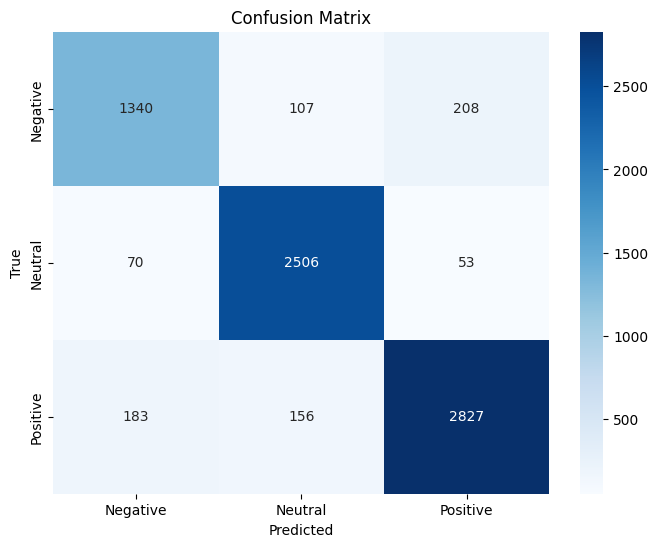


Enter manual text for prediction (press ENTER without input to exit):
Input text: Honestly, this post is completely off-base. I can’t believe how misguided some of these opinions are
Predicted label: -1
Input text: I’m not sure how I feel about this topic yet; it’s interesting but I need to see more perspectives
Predicted label: 1
Input text: Kudos to everyone who contributed—this community really knows how to lift each other up
Predicted label: 1
Input text: The discussion is engaging. I’m just here to observe and learn more about different viewpoints'
Predicted label: 1
Input text: I'm not really sure how I feel about this—it's all pretty standard to me
Predicted label: 1
Input text: I can see both sides here; nothing jumps out as particularly exciting or disappointing
Predicted label: -1
Input text: he post is informative enough, but it doesn't really evoke any strong emotions
Predicted label: 1
Input text: This post presents an update on the topic
Predicted label: 0
Input text: Th

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Step 9: Manual Prediction Section
def predict_manual_input(model_pipeline):
    """
    Repeatedly accepts manual text input and outputs the predicted label.
    Press ENTER without input to exit.
    """
    print("\nEnter manual text for prediction (press ENTER without input to exit):")
    while True:
        user_input = input("Input text: ").strip()
        if user_input == "":
            break
        prediction = model_pipeline.predict([user_input])
        print("Predicted label:", prediction[0])

# Run the manual prediction loop.
predict_manual_input(pipeline)